In [2]:
import logging
import collections
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open 
import pandas as pd
import numpy as np
from numpy import random
from collections import Counter
import heapq #check n largest
import json
import warnings
from sqlalchemy import create_engine 

In [3]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [4]:
bath_path = r'C:/Users/asus/Downloads/ADB_final/'

computer_security_and_networks = json.load(open(bath_path + r'computer-security-and-networks.json', encoding='utf8'))
algorithms = json.load(open(bath_path + r'algorithms.json', encoding='utf8'))
cloud_computing = json.load(open(bath_path + r'cloud-computing.json', encoding='utf8'))
data_management = json.load(open(bath_path + r'data-management.json', encoding='utf8'))
design_and_product = json.load(open(bath_path + r'design-and-product.json', encoding='utf8'))
electrical_engineering = json.load(open(bath_path + r'electrical-engineering.json', encoding='utf8'))
math_and_logic = json.load(open(bath_path + r'math-and-logic.json', encoding='utf8'))
mobile_and_web_development = json.load(open(bath_path + r'mobile-and-web-development.json', encoding='utf8'))
networking = json.load(open(bath_path + r'networking.json', encoding='utf8'))
probability_and_statistics = json.load(open(bath_path + r'probability-and-statistics.json', encoding='utf8'))
security = json.load(open(bath_path + r'security.json', encoding='utf8'))
machine_learning = json.load(open(bath_path + r'machine-learning.json', encoding='utf8'))
data_analysis = json.load(open(bath_path + r'data-analysis.json', encoding='utf8'))
software_development = json.load(open(bath_path + r'software-development.json', encoding='utf8'))

all_data = computer_security_and_networks + \
algorithms + \
cloud_computing + \
data_management + \
design_and_product + \
electrical_engineering + \
math_and_logic + \
mobile_and_web_development + \
networking + \
probability_and_statistics + \
security + \
machine_learning + \
data_analysis + \
software_development

In [5]:
len(all_data)

881

In [10]:
title=[]; week_data=[]; target_audience=[]; created_by=[]; teach_by=[]
week_data_title=[]; course_info=[]; department=[]; week_data_desc=[]
package_num=[];package_name=[]; level=[]; rating=[]; index=[]
# teach_by, week_data: 多值
for n in range(len(all_data)):
    for i in range(len(all_data[n]['teach_by'])):
            title.append(all_data[n]['title'])
            target_audience.append(all_data[n]['target_audience'])
            created_by.append(all_data[n]['created_by'])
            course_info.append(all_data[n]['course_info'])
            package_num.append(all_data[n]['package_num'])
            package_name.append(all_data[n]['package_name'])
            level.append(all_data[n]['level'])
            rating.append(all_data[n]['rating']) 
            index.append(n)
        #multiple values
            teach_by.append(list((all_data[n]['teach_by'][i].values()))[0])  
            department.append(list((all_data[n]['teach_by'][i].values()))[1])

In [11]:
data = pd.DataFrame({'index': index,
                    'title': title,
                    'target_audience': target_audience,
                    'created_by' : created_by,  
                    'course_info': course_info,
                    'teach_by': teach_by,
                     'department': department,
                     'level': level,
                     'rating': rating,
                     'package_num': package_num,
                     'package_name': package_name          
                    },
                    columns = ['index', 'title', 'course_info', 'target_audience', 'created_by','teach_by',
                               'department','package_num','package_name', 'level','rating'])

In [74]:
 len(course_list)

14

In [88]:
course_list_cat = ['computer_security_and_networks','algorithms','cloud_computing' ,'data_management' ,
               'design_and_product','electrical_engineering' ,'math_and_logic' ,'mobile_and_web_development' ,'networking',
              'probability_and_statistics','security','machine_learning' ,'data_analysis','software_development']

In [100]:
def get_course(course):
    #for cat_num in range(len(course)):
    cat=[]; title=[]; week_data=[]; target_audience=[]; created_by=[]; teach_by=[]
    week_data_title=[]; course_info=[]; department=[]; week_data_desc=[]
    package_num=[];package_name=[]; level=[]; rating=[]; index=[]
    for (category) in course:
        for n in range(len(eval(category))):
            for i in range(len(eval(category)[n]['teach_by'])):
                    cat.append(category)
                    title.append(eval(category)[n]['title'])
                    target_audience.append(eval(category)[n]['target_audience'])
                    created_by.append(eval(category)[n]['created_by'])
                    course_info.append(eval(category)[n]['course_info'])
                    package_num.append(eval(category)[n]['package_num'])
                    package_name.append(eval(category)[n]['package_name'])
                    level.append(eval(category)[n]['level'])
                    rating.append(eval(category)[n]['rating']) 
                    index.append(n)
                    teach_by.append(list((eval(category)[n]['teach_by'][i].values()))[0])  
                    department.append(list((eval(category)[n]['teach_by'][i].values()))[1])
                
    data = pd.DataFrame({
                   'category': cat,
                   'index': index,
                    'title': title,
                    'target_audience': target_audience,
                    'created_by' : created_by,  
                    'course_info': course_info,
                    'teach_by': teach_by,
                     'department': department,
                     'level': level,
                     'rating': rating,
                     'package_num': package_num,
                     'package_name': package_name          
                    },
                    columns = ['index','category', 'title',
                               'course_info', 'target_audience', 'created_by','teach_by',
                               'department','package_num','package_name', 'level','rating']) 
    return data

In [101]:
get_course(course_list_cat)

,index,category,title,course_info,target_audience,created_by,teach_by,department,package_num,package_name,level,rating
0,0,computer_security_and_networks,Bitcoin and Cryptocurrency Technologies,About this course: To really understand what i...,None,Princeton University,Computer Science,Arvind Narayanan,None,None,None,4.7
1,1,computer_security_and_networks,Cryptography I,About this course: Cryptography is an indispen...,None,Stanford University,Computer Science,Dan Boneh,None,None,None,4.8
2,2,computer_security_and_networks,Google Cloud Platform Fundamentals: Core Infra...,About this course: <<< ATTENTION >>> Learners ...,Who is this class for: This specialization is ...,Google Cloud,None,Google Cloud Training,1,Architecting with Google Cloud Platform Specia...,Intermediate,4.6
3,3,computer_security_and_networks,G Suite Administrator Fundamentals,About this course: G Suite Administrator Funda...,Who is this class for: This class is intended ...,Google Cloud,None,Google Cloud Training,None,None,Beginner,4.5
4,4,computer_security_and_networks,Usable Security,About this course: This course focuses on how ...,None,"University of Maryland, College Park",Human-Computer Interaction Lab,Jennifer Golbeck,1,Cybersecurity Specialization,None,4.5
5,5,computer_security_and_networks,Internet Connection: How to Get Online?,About this course: Welcome to the first of fiv...,Who is this class for: This class is designed ...,Cisco,None,Telethia Willis,1,Cisco Networking Basics Specialization,Beginner,4.7
6,6,computer_security_and_networks,Cybersecurity and Its Ten Domains,About this course: This course is designed to ...,Who is this class for: This course is designed...,University System of Georgia,Information Systems,Dr. Humayun Zafar,None,None,Beginner,4.1
7,7,computer_security_and_networks,Introduction to Cyber Attacks,About this course: This course provides learne...,None,New York University Tandon School of Engineering,Computer Science,Dr. Edward G. Amoroso,1,Introduction to Cyber Security Specialization,Beginner,4.5
8,8,computer_security_and_networks,Introduction to TCP/IP,About this course: You use the Internet throug...,None,Yonsei University,"Director, Communications & Networking Laboratory",Jong-Moon Chung,None,None,Beginner,4.4
9,9,computer_security_and_networks,Essential Cloud Infrastructure: Foundation,"About this course: This 1-week, accelerated on...",Who is this class for: This class is intended ...,Google Cloud,None,Google Cloud Training,2,Architecting with Google Cloud Platform Specia...,Intermediate,4.6


In [21]:
len(data.title.unique())

636

In [20]:
len(data.course_info.unique())

634

In [102]:
## Get course detail data and video list

In [16]:
title=[]; created_by=[]; course_info=[]; index=[]
week_data_title=[];  week_data_desc=[];week_data_video=[]

# teach_by, week_data: 多值
for n in range(len(all_data)):
    for i in range(len(all_data[n]['week_data'])):
        for j in range(len(all_data[n]['week_data'][i]['video'])):
            index.append(i)
            title.append(all_data[n]['title'])
            created_by.append(all_data[n]['created_by'])
            course_info.append(all_data[n]['course_info'])
            week_data_desc.append(all_data[n]['week_data'][i]['description'])
            week_data_title.append(all_data[n]['week_data'][i]['title'])
            week_data_video.append(all_data[n]['week_data'][i]['video'][j])

In [17]:
data_detail = pd.DataFrame({
                    'index': index,
                    'title': title,
                    'created_by' : created_by,  
                    'course_info': course_info,
                    'week_data_desc': week_data_desc,
                    'week_data_title': week_data_title,
                    'week_data_video': week_data_video
                    },
                    columns = ['index', 'title', 'created_by','course_info','week_data_desc', 'week_data_title','week_data_video'])

In [18]:
data_detail

,index,title,created_by,course_info,week_data_desc,week_data_title,week_data_video
0,0,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,"Learn about cryptographic building blocks (""pr...",Introduction to Crypto and Cryptocurrencies,Welcome
1,0,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,"Learn about cryptographic building blocks (""pr...",Introduction to Crypto and Cryptocurrencies,Cryptographic Hash Functions
2,0,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,"Learn about cryptographic building blocks (""pr...",Introduction to Crypto and Cryptocurrencies,Hash Pointers and Data Structures
3,0,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,"Learn about cryptographic building blocks (""pr...",Introduction to Crypto and Cryptocurrencies,Digital Signatures
4,0,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,"Learn about cryptographic building blocks (""pr...",Introduction to Crypto and Cryptocurrencies,Public Keys as Identities
5,0,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,"Learn about cryptographic building blocks (""pr...",Introduction to Crypto and Cryptocurrencies,A Simple Cryptocurrency
6,0,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,"Learn about cryptographic building blocks (""pr...",Introduction to Crypto and Cryptocurrencies,Scrooge Coin
7,1,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,Learn Bitcoin's consensus mechanism and reason...,How Bitcoin Achieves Decentralization,Centralization vs. Decentralization
8,1,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,Learn Bitcoin's consensus mechanism and reason...,How Bitcoin Achieves Decentralization,Distributed Consensus
9,1,Bitcoin and Cryptocurrency Technologies,Princeton University,About this course: To really understand what i...,Learn Bitcoin's consensus mechanism and reason...,How Bitcoin Achieves Decentralization,Consensus without Identity: the Block Chain


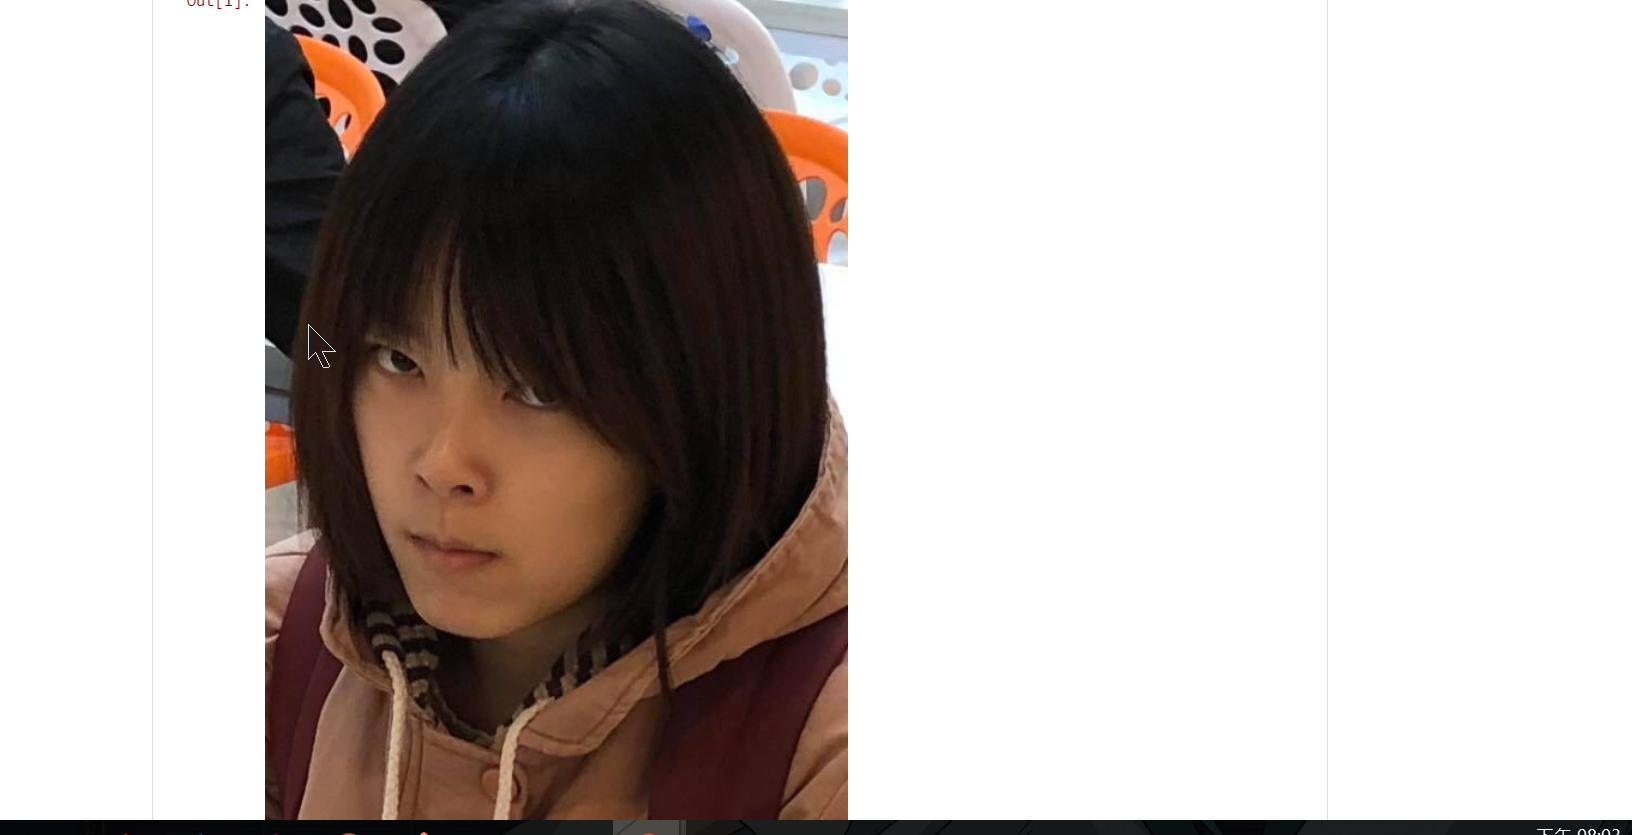

In [14]:
#IsDuplicated = data_to_mysql.duplicated()

In [31]:
# duplicate_course=0
# for i in range(len(data_to_mysql)):
#     if IsDuplicated[i] == True:
#         duplicate_course=duplicate_course+1
#         #print(i)
# print(duplicate_course)

167


In [30]:
#data = data_to_mysql.drop_duplicates()

In [31]:
#data_to_mysql.head()

### --------------------------------------------------------------------------------

In [458]:
### Testing

In [464]:
# v=[]
# for n in range(len(all_data)):
#     for j in range(len(all_data[n]['week_data'])):     
#         v.append(list((all_data[n]['week_data'][j]).values())[0])
#         #a.append(pd.Series(v).str.cat(sep='')) 

In [385]:
# v= pd.Series(v).str.cat(sep='')